In [1]:
from pyscf import gto, scf
import numpy as np
from pyblock2._pyscf.ao2mo import integrals as itg
from pyblock2.driver.core import DMRGDriver, SymmetryTypes

In [2]:

ncas=38
n_elec=32#fockspace= [(5, 2), (3, 3), (3, 3), (3, 3),(2,5)]
spin=6

orb_sym=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0 ,0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0]
h1e=np.load("ints_h1.npy")
g2e=np.load("ints_h2.npy")
#ecore=np.load("ints_h0.npy")
ecore= -3172.997633923457
print("NCAS = %d NCASELEC = %d" % (ncas, n_elec))
noises = [1e-4] * 4 + [1e-5] * 4 + [0]
thrds = [1e-10] * 8
driver = DMRGDriver(scratch="./tmp_", symm_type=SymmetryTypes.SU2, stack_mem=4 << 30, n_threads=32)




NCAS = 38 NCASELEC = 32


In [3]:
#idx = driver.orbital_reordering(h1e, g2e, method="gaopt")
idx=np.array([31, 32, 30, 33, 34, 35, 36, 37, 25, 22, 27, 24, 26, 23, 28, 29, 20, 17,  0, 18, 21, 16, 19,  1,11, 14, 10, 12, 13, 15,  9,  7,  5,  8,  6,  2,  3,  4])
h1e = h1e[idx][:, idx]
g2e = g2e[idx][:, idx][:, :, idx][:, :, :, idx]
orb_sym = np.array(orb_sym)[idx]


Loading KET

In [4]:
driver.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)
mpo = driver.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=2)
ket = driver.load_mps(tag='KET-ORIG')
ket = driver.adjust_mps(ket, dot=2)[0]


integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =    1099308

Build MPO | Nsites =    38 | Nterms =    1099308 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /    38 .. Mmpo =    14 DW = 0.00e+00 NNZ =       14 SPT = 0.0000 Tmvc = 0.011 T = 0.040
 Site =     1 /    38 .. Mmpo =    50 DW = 0.00e+00 NNZ =       56 SPT = 0.9200 Tmvc = 0.018 T = 0.078
 Site =     2 /    38 .. Mmpo =   120 DW = 0.00e+00 NNZ =     2259 SPT = 0.6235 Tmvc = 0.021 T = 0.087
 Site =     3 /    38 .. Mmpo =   150 DW = 0.00e+00 NNZ =     2703 SPT = 0.8498 Tmvc = 0.024 T = 0.104
 Site =     4 /    38 .. Mmpo =   188 DW = 0.00e+00 NNZ =     4274 SPT = 0.8484 Tmvc = 0.032 T = 0.114
 Site =     5 /    38 .. Mmpo =   234 DW = 0.00e+00 NNZ =     6148 SPT = 0.8602 Tmvc = 0.035 T = 0.129
 Site =     6 /    38 .. Mmpo =   288 DW = 0.00e+00 NNZ =     8287 SPT = 0.8770 Tmvc = 0.037 T = 0.137
 Site =     7 /    38 .. Mmpo =   350 DW = 0.00e+00 NNZ =    10658 SPT = 0.8943 Tmvc = 0.038 T = 0.140

In [5]:
bond_dims = [1050] *30 + [900] *30 + [750] *30
noises = [0] * 72
thrds = [1e-8] * 2

energies = driver.dmrg(mpo, ket, n_sweeps=120, bond_dims=bond_dims, noises=noises,
                     tol=0, thrds=thrds, iprint=2,twosite_to_onesite=118)


Environment initialization | Nsites =    38 | Center =    18
 INIT-L --> Site =    1 ..  Bmem =   352 B Rmem =   352 B T = 0.00
 INIT-L --> Site =    2 ..  Bmem = 13.5 KB Rmem = 13.5 KB T = 0.00
 INIT-L --> Site =    3 ..  Bmem =  496 KB Rmem =  496 KB T = 0.00
 INIT-L --> Site =    4 ..  Bmem = 7.74 MB Rmem = 7.47 MB T = 0.02
 INIT-L --> Site =    5 ..  Bmem =  124 MB Rmem = 87.3 MB T = 0.13
 INIT-L --> Site =    6 ..  Bmem = 1.41 GB Rmem =  227 MB T = 0.69
 INIT-L --> Site =    7 ..  Bmem = 3.61 GB Rmem =  276 MB T = 1.76
 INIT-L --> Site =    8 ..  Bmem = 4.35 GB Rmem =  335 MB T = 2.24
 INIT-L --> Site =    9 ..  Bmem = 5.21 GB Rmem =  395 MB T = 2.70
 INIT-L --> Site =   10 ..  Bmem = 6.12 GB Rmem =  447 MB T = 3.16
 INIT-L --> Site =   11 ..  Bmem = 6.95 GB Rmem =  538 MB T = 3.61
 INIT-L --> Site =   12 ..  Bmem = 8.24 GB Rmem =  604 MB T = 4.29
 INIT-L --> Site =   13 ..  Bmem = 9.20 GB Rmem =  696 MB T = 4.74
 INIT-L --> Site =   14 ..  Bmem = 10.5 GB Rmem =  800 MB T = 5.39
 

: 

Energy Extrapolation


In [10]:

import scipy.stats

ds, dws, eners = driver.get_dmrg_results()
print(eners)
print('BOND DIMS         = ', ds[3::4])
print('Discarded Weights = ', dws[3::4])
print('Energies          = ', eners[3::4, 0])
reg = scipy.stats.linregress(dws[3::4], eners[3::4, 0])
emin, emax = min(eners[3::4, 0]), max(eners[3::4, 0])
print('DMRG energy (extrapolated) = %20.15f +/- %15.10f' %
            (reg.intercept, abs(reg.intercept - emin) / 5))
      

[[-3344.2040671 ]
 [-3344.20447531]
 [-3344.20459692]
 [-3344.20465148]
 [-3344.2046403 ]
 [-3344.20437288]
 [-3344.20438173]
 [-3344.20438776]
 [-3344.20434725]
 [-3344.20411564]
 [-3344.20412728]
 [-3344.20413275]
 [-3344.20408396]
 [-3344.20376663]
 [-3344.20378523]
 [-3344.20378975]]
BOND DIMS         =  [1000  800  700  600]
Discarded Weights =  [6.31781262e-06 1.05783055e-05 1.33549276e-05 1.65758123e-05]
Energies          =  [-3344.20465148 -3344.20438776 -3344.20413275 -3344.20378975]
DMRG energy (extrapolated) = -3344.205221162141243 +/-    0.0001139362


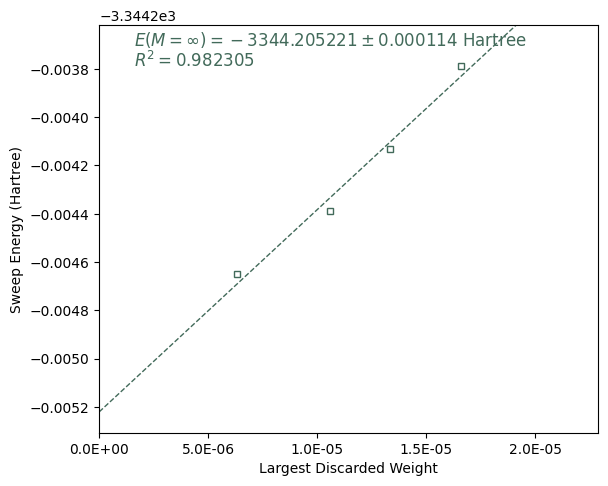

In [11]:
import matplotlib.pyplot as plt
from matplotlib import ticker
de = emax - emin
x_reg = np.array([0, dws[-1] + dws[3]])
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1E}"))
plt.plot(x_reg, reg.intercept + reg.slope * x_reg, '--', linewidth=1, color='#426A5A')
plt.plot(dws[3::4], eners[3::4, 0], ' ', marker='s', mfc='white', mec='#426A5A', color='#426A5A', markersize=5)
plt.text(dws[3] * 0.25, emax + de * 0.1, "$E(M=\\infty) = %.6f \\pm %.6f \\mathrm{\\ Hartree}$" %
    (reg.intercept, abs(reg.intercept - emin) / 5), color='#426A5A', fontsize=12)
plt.text(dws[3] * 0.25, emax - de * 0.0, "$R^2 = %.6f$" % (reg.rvalue ** 2),
    color='#426A5A', fontsize=12)
plt.xlim((0, dws[-1] + dws[3]))
plt.ylim((reg.intercept - de * 0.1, emax + de * 0.2))
plt.xlabel("Largest Discarded Weight")
plt.ylabel("Sweep Energy (Hartree)")
plt.subplots_adjust(left=0.17, bottom=0.1, right=0.95, top=0.95)